In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [25]:
df = pd.read_csv( 'globalterrorismdb_0718dist.csv' , encoding= 'latin1' , low_memory= False )
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [26]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [28]:
df.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('O'), dtype('float64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       

In [29]:
df.rename(columns= {'iyear':'Year','imonth':'Month','iday':'Day','gname':'Group','country_txt':'Country','attacktype1_txt':'Attacktype','nwound':'Wound','targtype1_txt':'TargetType','target1':'Target','weaptype1':'Weapon','nkill':'Kill','provstate':'State'},inplace=True)

In [30]:
df = df[['Year','Month','Day','Group','Country','State','region','city','latitude','longitude','Attacktype','Kill','Wound','Target','TargetType','Weapon']]
df.head()

,Year,Month,Day,Group,Country,State,region,city,latitude,longitude,Attacktype,Kill,Wound,Target,TargetType,Weapon
0,1970,7,2,MANO-D,Dominican Republic,NaN,2,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,Private Citizens & Property,13
1,1970,0,0,23rd of September Communist League,Mexico,Federal,1,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",Government (Diplomatic),13
2,1970,1,0,Unknown,Philippines,Tarlac,5,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Journalists & Media,13
3,1970,1,0,Unknown,Greece,Attica,8,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Government (Diplomatic),6
4,1970,1,0,Unknown,Japan,Fukouka,4,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Government (Diplomatic),8


In [31]:
df['Kill']  = df['Kill'].fillna(0)
df['Wound']  = df['Wound'].fillna(0)
df

,Year,Month,Day,Group,Country,State,region,city,latitude,longitude,Attacktype,Kill,Wound,Target,TargetType,Weapon
0,1970,7,2,MANO-D,Dominican Republic,NaN,2,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,Private Citizens & Property,13
1,1970,0,0,23rd of September Communist League,Mexico,Federal,1,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",Government (Diplomatic),13
2,1970,1,0,Unknown,Philippines,Tarlac,5,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Journalists & Media,13
3,1970,1,0,Unknown,Greece,Attica,8,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Government (Diplomatic),6
4,1970,1,0,Unknown,Japan,Fukouka,4,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Government (Diplomatic),8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Al-Shabaab,Somalia,Middle Shebelle,11,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,Military,5
181687,2017,12,31,Muslim extremists,Syria,Lattakia,10,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,Military,6
181688,2017,12,31,Bangsamoro Islamic Freedom Movement (BIFM),Philippines,Maguindanao,5,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,Private Citizens & Property,8
181689,2017,12,31,Unknown,India,Manipur,6,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,Government (General),6


In [32]:
df['Casualities'] = df['Kill'] + df['Wound']

In [33]:
df.isnull().sum()

Year              0
Month             0
Day               0
Group             0
Country           0
State           421
region            0
city            434
latitude       4556
longitude      4557
Attacktype        0
Kill              0
Wound             0
Target          636
TargetType        0
Weapon            0
Casualities       0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Group        181691 non-null  object 
 4   Country      181691 non-null  object 
 5   State        181270 non-null  object 
 6   region       181691 non-null  int64  
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  Attacktype   181691 non-null  object 
 11  Kill         181691 non-null  float64
 12  Wound        181691 non-null  float64
 13  Target       181055 non-null  object 
 14  TargetType   181691 non-null  object 
 15  Weapon       181691 non-null  int64  
 16  Casualities  181691 non-null  float64
dtypes: float64(5), int64(5), object(7)
memory usage: 23.6+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1995'),
  Text(25, 0, '1996'),
  Text(26, 0, '1997'),
  Text(27, 0, '1998'),
  Text(28, 0, '1999'),
  Text(29, 0, '2000'),
  Text(30, 0, '2001'),
  Text(31, 0, '2002'),
  Text(32, 0, '2003'),
  Text(33, 0, '2004'),
  Text(34, 0, 

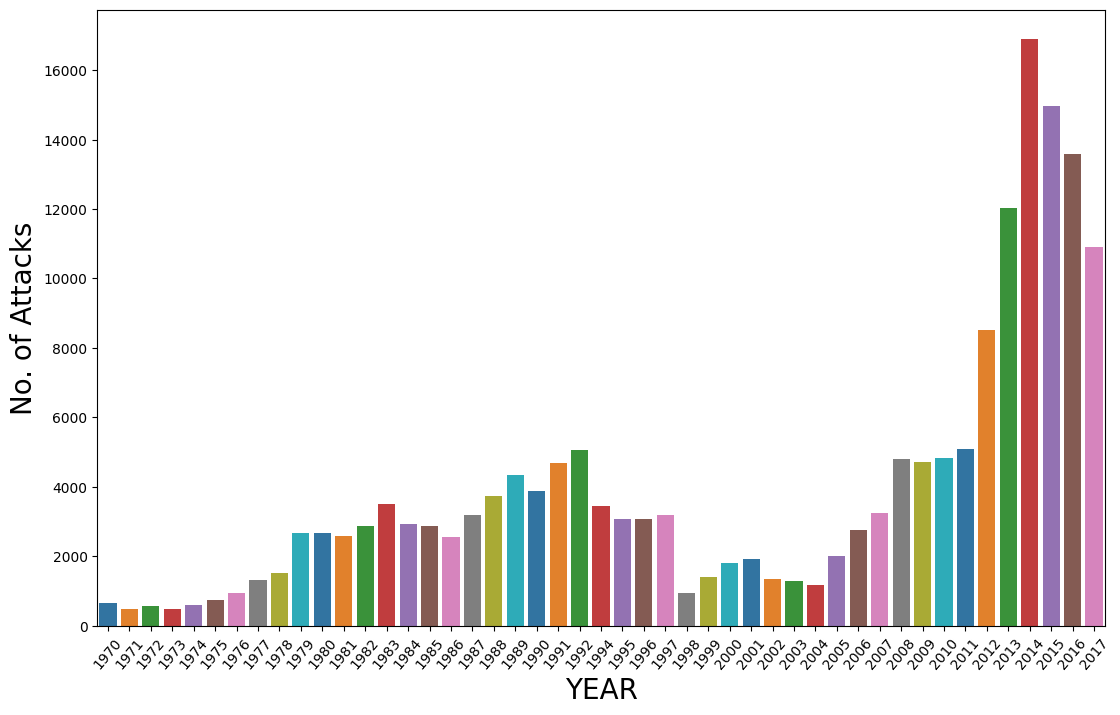

In [46]:
plt.figure(figsize=(13,8))
sns.barplot(x=df['Year'].unique(),y=df['Year'].value_counts(dropna = False).sort_index(),palette='tab10')
plt.xlabel('YEAR',fontsize = 20)
plt.ylabel('No. of Attacks',fontsize = 20)
plt.xticks(rotation =50)

Text(0, 0.5, 'Deaths due to Terrorist attack')

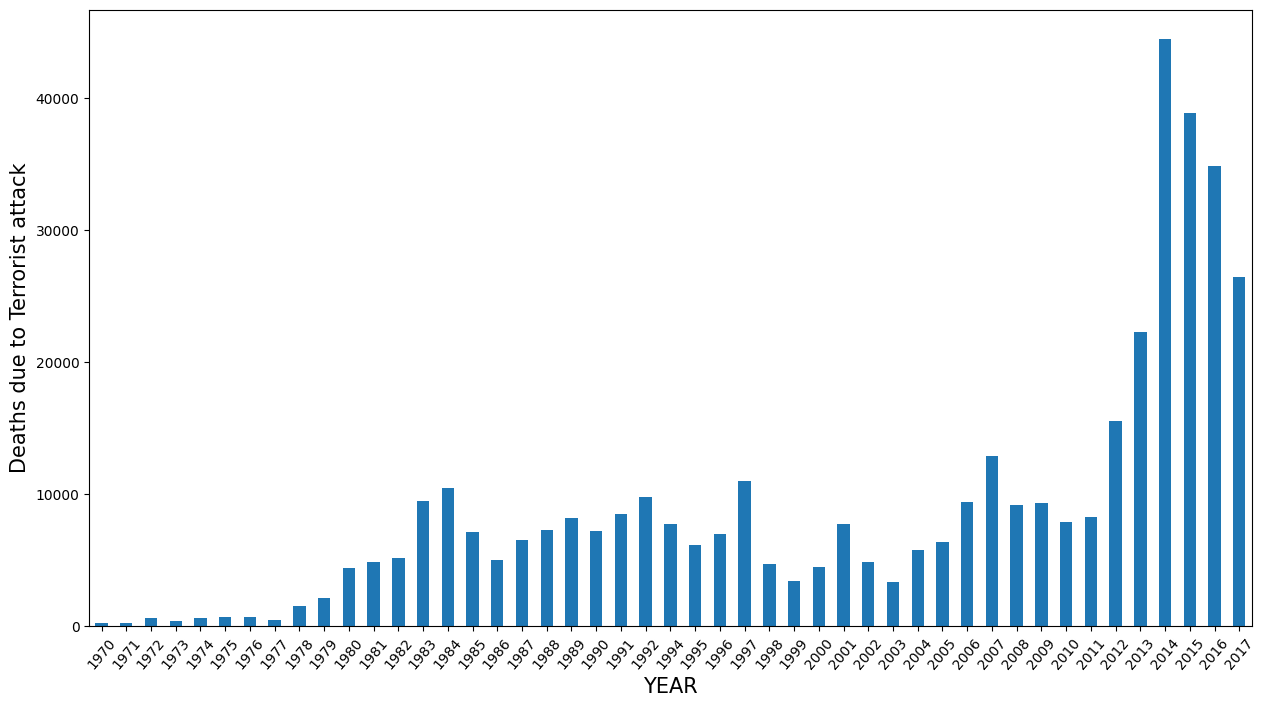

In [47]:
plt.figure(figsize=(15,8))
x = df[['Year','Kill']].groupby(df['Year']).sum()
x = x.iloc[:,1]
x.plot(kind = 'bar')
plt.xticks(rotation = 50)
plt.xlabel('YEAR',fontsize = 15)
plt.ylabel('Deaths due to Terrorist attack',fontsize = 15)

Text(0, 0.5, 'Casualities due to Terrorist attack')

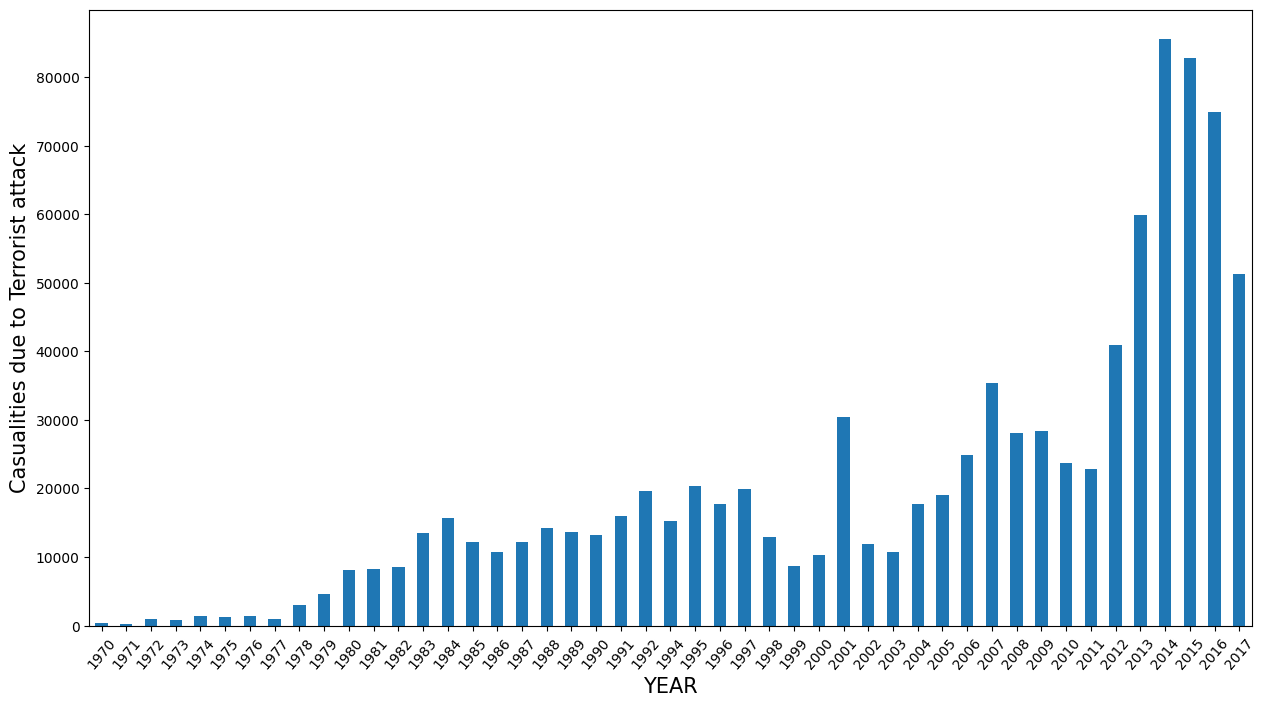

In [48]:
plt.figure(figsize=(15,8))
x = df[['Year','Casualities']].groupby(df['Year']).sum()
x = x.iloc[:,1]
x.plot(kind = 'bar')
plt.xticks(rotation = 50)
plt.xlabel('YEAR',fontsize = 15)
plt.ylabel('Casualities due to Terrorist attack',fontsize = 15)

Text(0, 0.5, 'No. of Terrorism Cases')

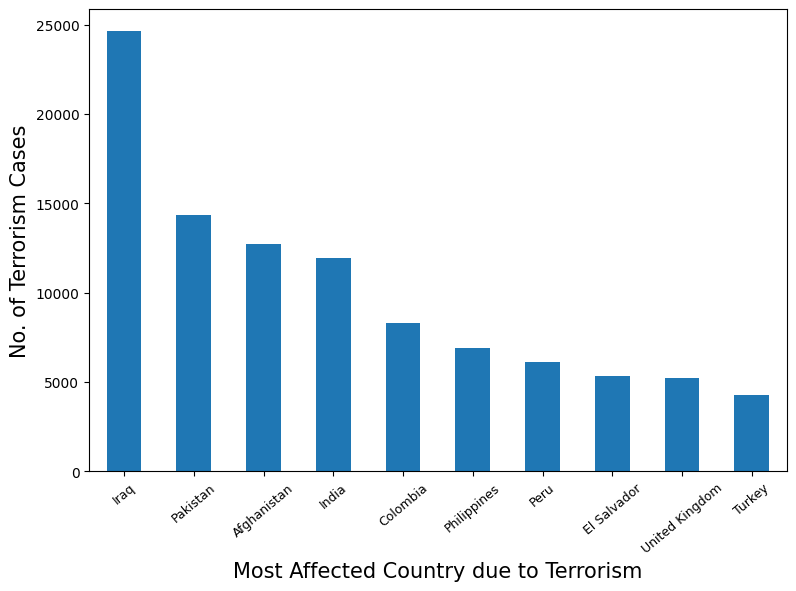

In [38]:
plt.figure(figsize=(9,6))
df['Country'].value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 40,fontsize = 9)
plt.xlabel('Most Affected Country due to Terrorism',fontsize = 15)
plt.ylabel('No. of Terrorism Cases',fontsize = 15)

Text(0, 0.5, 'No. of Terrorism Cases')

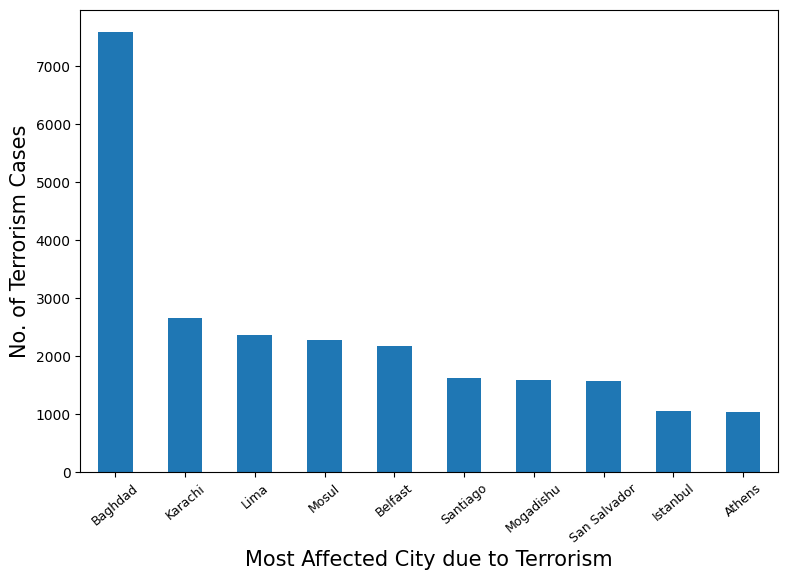

In [39]:
plt.figure(figsize=(9,6))
df['city'].value_counts().sort_values(ascending = False).drop('Unknown').head(10).plot(kind = 'bar')
plt.xticks(rotation = 40,fontsize = 9)
plt.xlabel('Most Affected City due to Terrorism',fontsize = 15)
plt.ylabel('No. of Terrorism Cases',fontsize = 15)

C:\Users\shree\AppData\Local\Temp\ipykernel_8624\1059759251.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df[['State','Casualities']].groupby(df['State']).sum()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Baghdad'),
  Text(1, 0, 'Nineveh'),
  Text(2, 0, 'Saladin'),
  Text(3, 0, 'Al Anbar'),
  Text(4, 0, 'Diyala'),
  Text(5, 0, 'New York'),
  Text(6, 0, 'Borno'),
  Text(7, 0, 'Punjab'),
  Text(8, 0, 'Babil'),
  Text(9, 0, 'Jammu and Kashmir')])

<Figure size 1500x800 with 0 Axes>

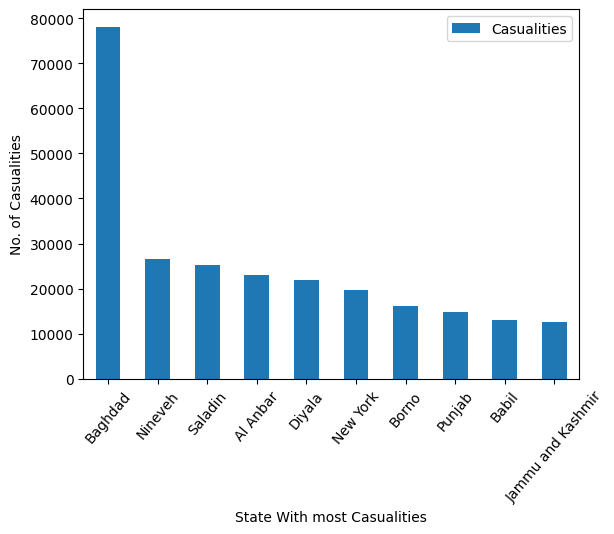

In [40]:
plt.figure(figsize=(15,8))
x = df[['State','Casualities']].groupby(df['State']).sum()
x = x.sort_values('Casualities',ascending=False).drop('Unknown')
x.head(10).plot(kind = 'bar').set(xlabel = 'State With most Casualities' , ylabel = 'No. of Casualities')
plt.xticks(rotation = 50)

C:\Users\shree\AppData\Local\Temp\ipykernel_8624\1821184687.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df[['Country','Casualities']].groupby(df['Country']).sum()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Afghanistan'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Nigeria'),
  Text(5, 0, 'Sri Lanka'),
  Text(6, 0, 'Syria'),
  Text(7, 0, 'Colombia'),
  Text(8, 0, 'United States'),
  Text(9, 0, 'Philippines')])

<Figure size 1500x800 with 0 Axes>

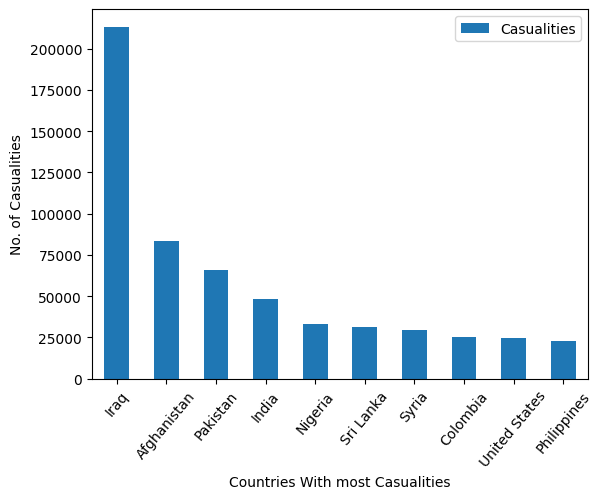

In [41]:
plt.figure(figsize=(15,8))
x = df[['Country','Casualities']].groupby(df['Country']).sum()
x = x.sort_values('Casualities',ascending=False)
x.head(10).plot(kind = 'bar').set(xlabel = 'Countries With most Casualities' , ylabel = 'No. of Casualities')
plt.xticks(rotation = 50)

<Axes: title={'center': 'Terrorist attacks in the World'}, xlabel='longitude', ylabel='latitude'>

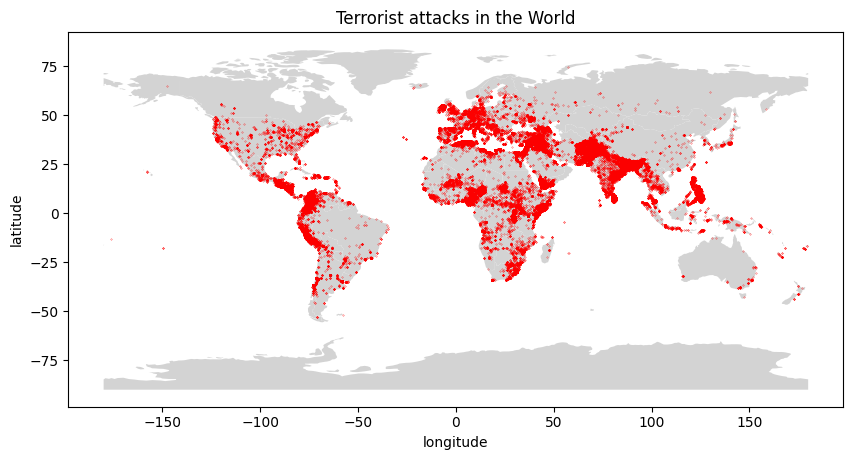

In [42]:
fig, ax = plt.subplots(figsize = (10,10))
df1 = df[df['longitude']>=-180]
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries.plot(color = 'lightgrey',ax = ax)
df1.plot(x = 'longitude',y = 'latitude',kind = 'scatter',title = "Terrorist attacks in the World", ax =ax, s = 0.05,c = 'red')

## **CONCLUSION**
1. This dataset is the record of all the Terrorist attacks happened in the world with details.
2. Since this dataset is compiled over from 1970 to 2017 making this dataset full of redundent and even corrupted data. 
3. As per the dataset, **2014 was the most active year for terrorist activities and also with highest number of Casualities and deaths due to Terrorism**.
4. Also, **Iraq and it's capital Baghdad are the biggest Hotspot for terrorist activities over all the years**.